In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from noshellavg import *
from plot_error import * 
from run_error_analysis import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [59]:
def printout_matrix_component(mat):
    nx, ny = mat.shape
    start = ''
    for i in np.arange(nx):
        for j in np.arange(ny):
            start+='  {:3.3e}'.format(mat[i][j])

        print '['+ start+']'
        start = ''     

In [80]:
def correlation_matrix(mat):
    
    nx, ny = mat.shape
    corrmat = np.zeros((nx, ny))
    for i in np.arange(nx):
        for j in np.arange(ny):
            corrmat[i][j] = mat[i][j] / np.sqrt(mat[i][i]*mat[j][j] )
    return corrmat

In [81]:
def plot_fisher_corr_matrix(fisher):
    
    
    labels = [r'$b$', r'$f$', r'$\sigma_{v,p}$', r'$1/\bar{n}$',r'$b$', r'$f$', r'$\sigma_{v,\xi}$']
    nx, ny = fisher.shape
    cov = inv(fisher)
    corrmat = correlation_matrix(cov)
    fig, (ax, ax2) = plt.subplots(1,2, figsize = (14,6))
    im = ax.imshow(fisher, interpolation = 'none')
    im2 = ax2.imshow(corrmat, interpolation = 'none')
    fig.colorbar(im, ax=ax)
    fig.colorbar(im2, ax=ax2)

    ax.set_xticks(np.arange(0, nx, 1));
    ax.set_yticks(np.arange(0, nx, 1));
    ax.set_xticklabels(labels);
    ax.set_yticklabels(labels);
    ax.set_title('Fisher')
    ax2.set_xticks(np.arange(0, nx, 1));
    ax2.set_yticks(np.arange(0, nx, 1));
    ax2.set_xticklabels(labels);
    ax2.set_yticklabels(labels);
    ax2.set_title('corr')

In [10]:
cov_p = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfs_PP.cov')
cov_xi = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfs_Xi.cov')
bandpower_fisher_p = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfs_bandpower_PP.fisher')
bandpower_fisher_xi = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfs_bandpower_Xi.fisher')
print np.sum(inv(cov_xi)), np.sum(inv(cov_p))
print np.sum(bandpower_fisher_xi), np.sum(bandpower_fisher_p)

23422818.3803 39.4395277209
-1.68869857876e-12 39.4395277224


In [11]:
dat_p = np.genfromtxt('data_txt/snr/default_kN100_ke-3_rN180_re-3_bfsn_snr_p')
dat_xi = np.genfromtxt('data_txt/snr/default_kN100_ke-3_rN180_re-3_bfsn_snr_xi')

fig save to  figure/snr_test.png


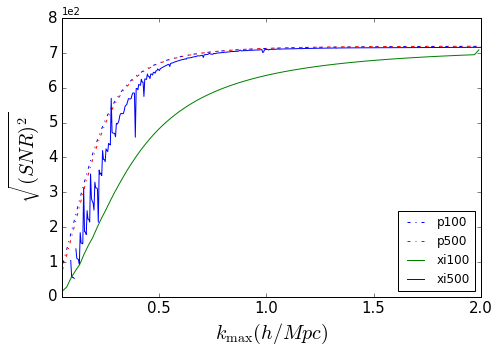

In [29]:
filename = ['data_txt/snr/default_kN100_ke-3_rN180_re-3_bfs_snr_p',
            'data_txt/snr/default_kN500_ke-3_rN180_re-3_bfs_snr_p',
            'data_txt/snr/default_kN100_ke-3_rN180_re-3_bfs_snr_xi',
            'data_txt/snr/default_kN500_ke-3_rN180_re-3_bfs_snr_xi',
            #'data_txt/snr/default_kN100_ke-3_rN300_re-3_bfs_snr_xi'
            #'data_txt/snr/default_kN500_ke-10_rN180_re-3_bfs_snr_tot',
            #'data_txt/snr/default_kN100_ke-3_rN180_re-3_bfs_snr_tot'
            ]
kind = [1, 1, 0, 0, 0,0]
labels = ['p100', 'p500', 'xi100', 'xi500', '']
color = ['blue', 'red', 'green', 'blue', 'cyan','green']
plot_snr(filename = filename, labels =labels, kind = kind, color=color, 
          out_name = 'figure/snr_test.png')

fig save to  figure/reid_marginalization_comparison.png


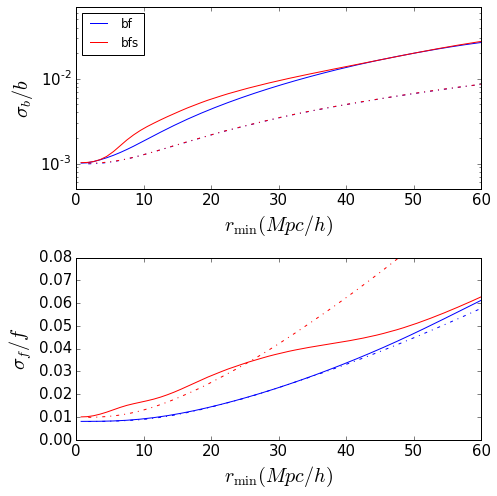

In [158]:
filename = ['data_txt/reid/default_kN500_ke-3_rN180_re-3_bf_reid_p.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfs_reid_p.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bf_reid_xi.txt',
            'data_txt/reid/default_kN500_ke-3_rN180_re-3_bfs_reid_xi.txt'
            ]
kind = [1, 1, 0, 0, 0, 0]
labels = ['', '','bf', 'bfs', 'bfsn']
color = ['blue', 'red', 'blue', 'red', 'green', 'red']
plot_reid(filename = filename, labels =labels, kind = kind, color=color,\
          out_name = 'figure/reid_marginalization_comparison.png')

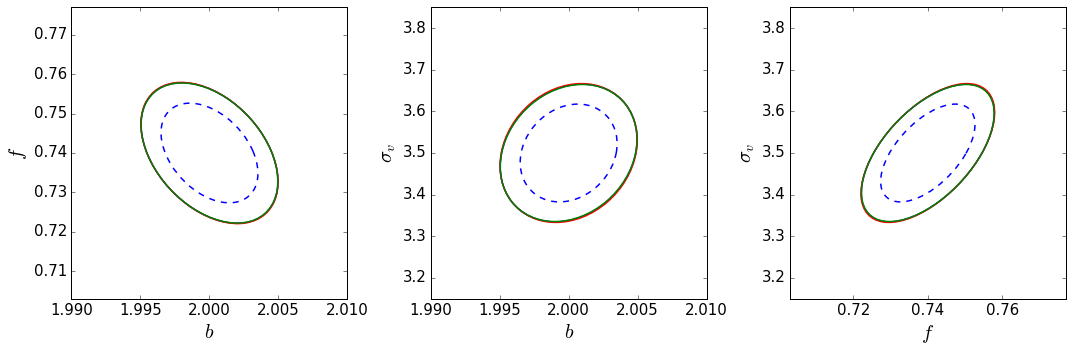

In [35]:
fisher_params_filename = ['data_txt/default_kN500_ke-3_rN180_re-3_bfs_fisher_params.txt']
                          #'data_txt/sanchez_bfsn_fisher_params.txt']
plot_triple_ellipse(fisher_params_filename, parameter_name = [r'$b$', r'$f$', r'$\sigma_v$']\
                 , parameter_truth = [2.0, 0.74, 3.5], diffsky=1
                 , extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1]]
                 , text_label = '\n', out_name = 'figure/ellipse_all.png')

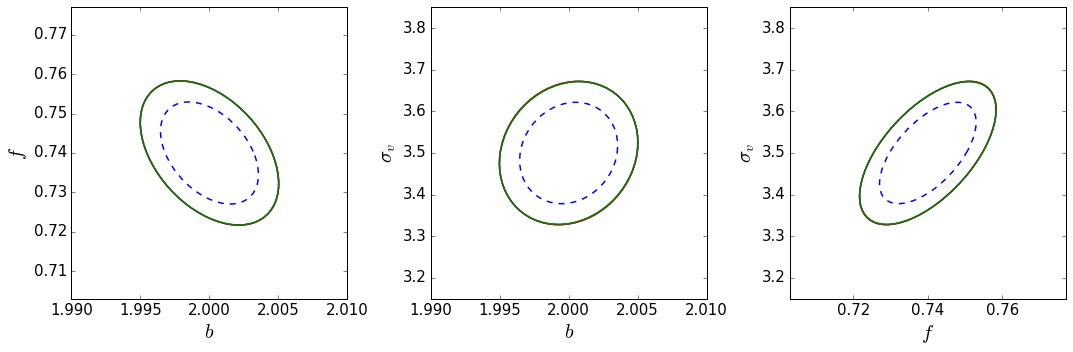

In [45]:
fisher_params_filename = ['data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt']
                          #'data_txt/sanchez_bfsn_fisher_params.txt']
plot_triple_ellipse(fisher_params_filename, parameter_name = [r'$b$', r'$f$', r'$\sigma_v$']\
                 , parameter_truth = [2.0, 0.74, 3.5,  1e+4/3.], diffsky=1
                 , extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1],  [0.9, 1.1]]
                 , text_label = '\n', out_name = 'figure/ellipse_all.png')

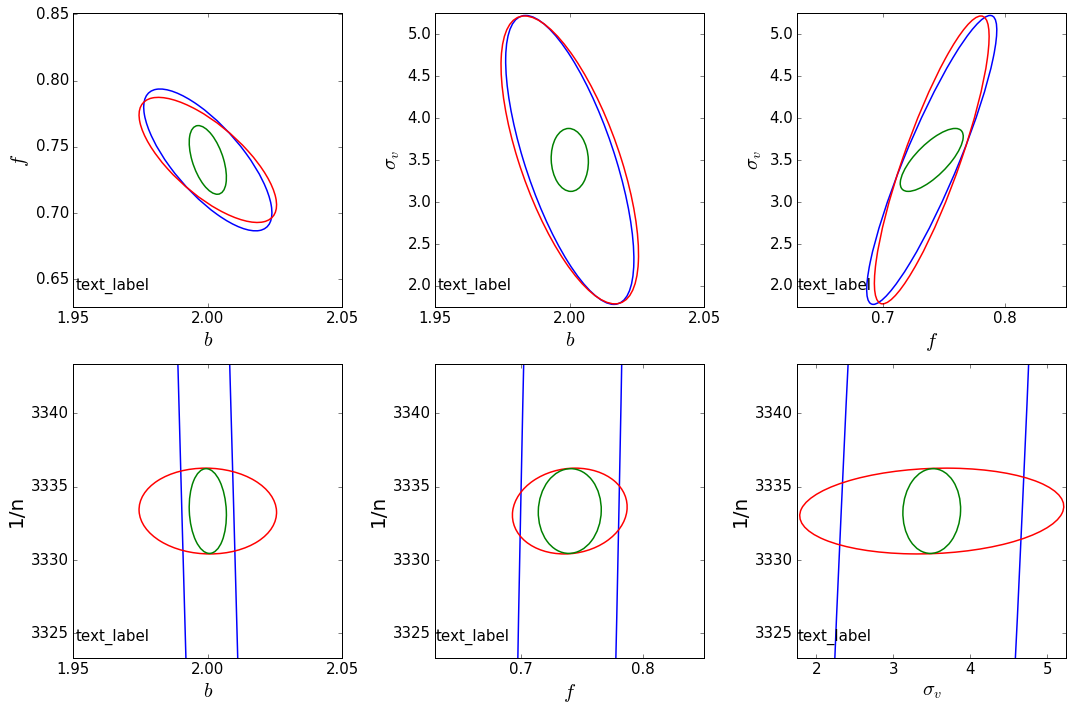

In [255]:
plot_triple_ellipse(['data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params.txt']
                 , parameter_name = [r'$b$', r'$f$', r'$\sigma_v$', r'1/n']\
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                 , parameter_truth = [2.0, 0.74, 3.5, 1e+4/3.], diffsky=0, dnn=0
                 , keeps = [[0,1], [0,2], [1,2],[0,3], [1,3], [2,3]]
                 , extent =[[0.975, 1.025], [0.85, 1.15], [0.5, 1.5], [0.997, 1.003]]
                 #, extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1], [0.9995, 1.0005]]
                 , text_label = 'text_label\n', out_name = 'test.png')

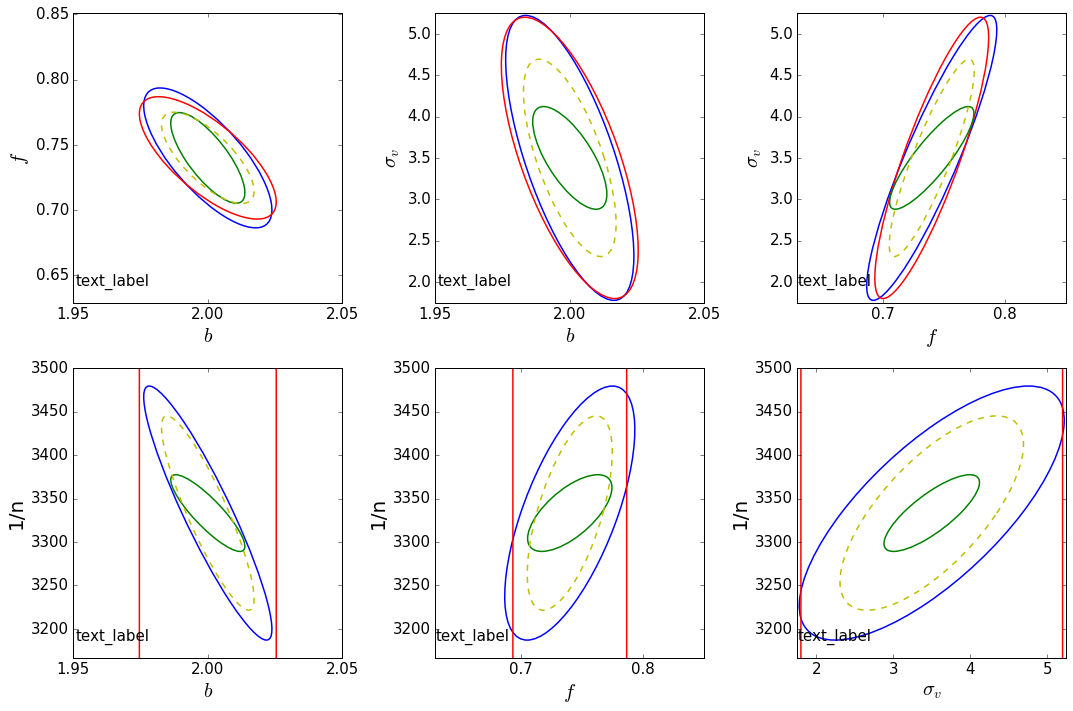

In [259]:
plot_triple_ellipse(['data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params_nn.txt']
                 , parameter_name = [r'$b$', r'$f$', r'$\sigma_v$', r'1/n']\
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                 , parameter_truth = [2.0, 0.74, 3.5, 1e+4/3.], diffsky=0, dnn=0
                 , keeps = [[0,1], [0,2], [1,2],[0,3], [1,3], [2,3]]
                 , extent =[[0.975, 1.025], [0.85, 1.15], [0.5, 1.5], [0.95, 1.05]]
                 #, extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1], [0.9995, 1.0005]]
                 , text_label = 'text_label\n', out_name = 'test.png')

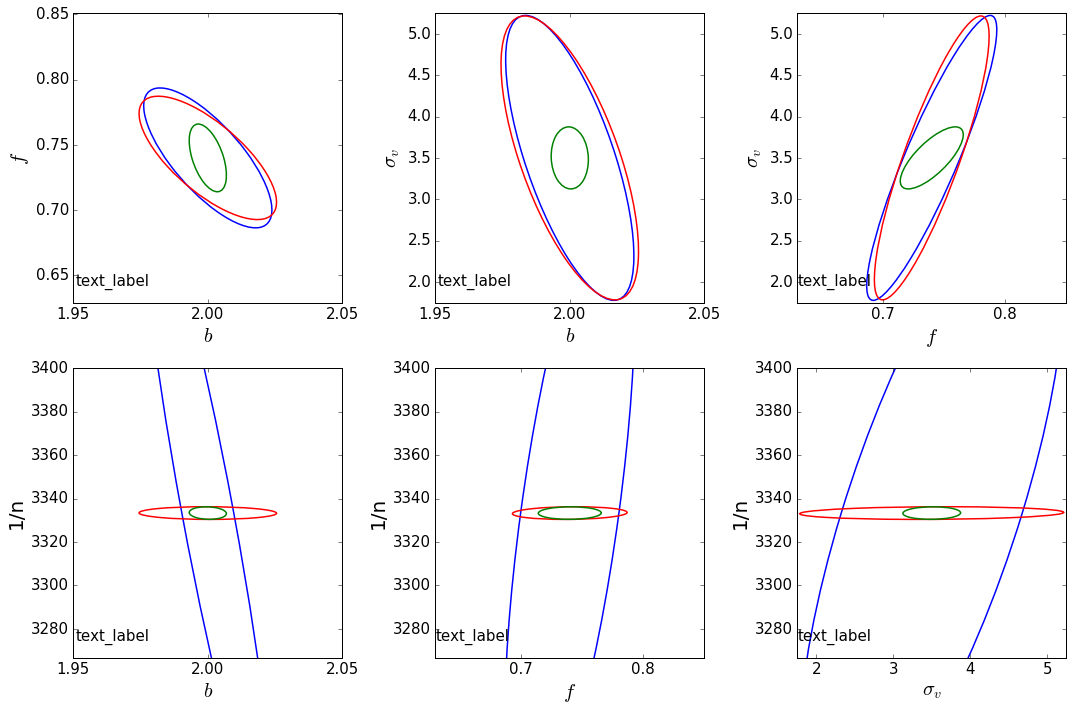

In [263]:
plot_triple_ellipse(['data_txt/test_bfsn_k0_02_kN500_r18_180_rN162_fisher_params.txt']
                 , parameter_name = [r'$b$', r'$f$', r'$\sigma_v$', r'1/n']\
                 , linecolor = ['b', 'r', 'g', 'y' ,'c', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                 , parameter_truth = [2.0, 0.74, 3.5, 1e+4/3.], diffsky=0, dnn=0
                 , keeps = [[0,1], [0,2], [1,2],[0,3], [1,3], [2,3]]
                 , extent =[[0.975, 1.025], [0.85, 1.15], [0.5, 1.5], [0.98, 1.02]]
                 #, extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1], [0.9995, 1.0005]]
                 , text_label = 'text_label\n', out_name = 'test.png')

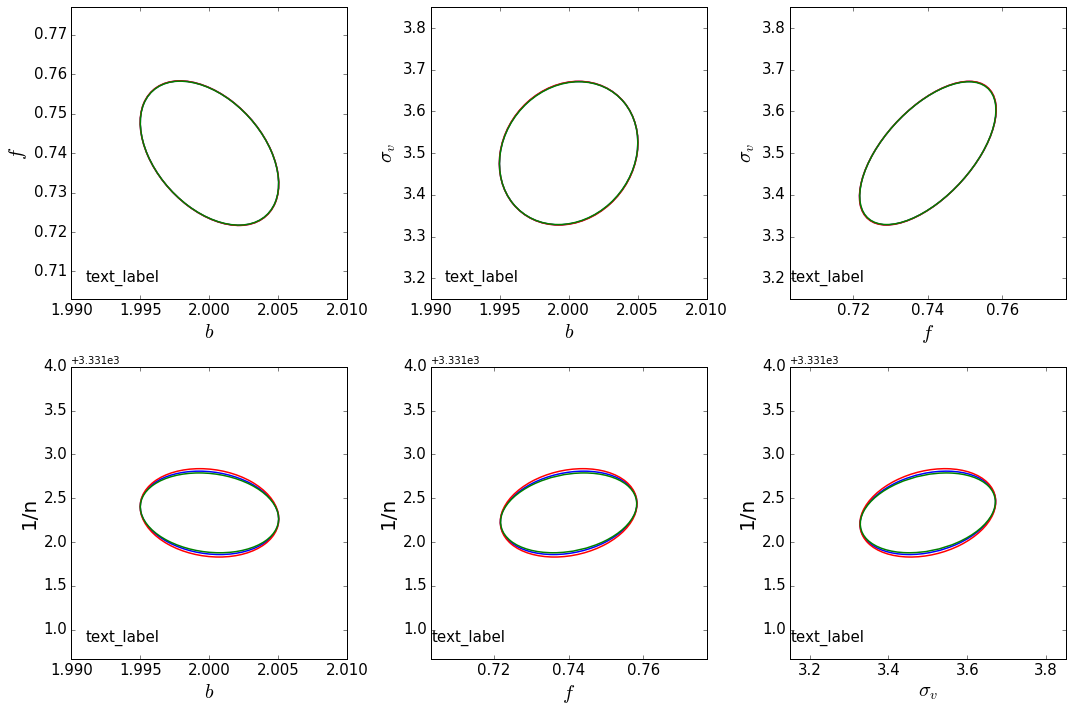

In [254]:
plot_triple_ellipse(['data_txt/default_kN500_ke-3_rN180_re-3_bfsn_fisher_params.txt']
                 , parameter_name = [r'$b$', r'$f$', r'$\sigma_v$', r'1/n']\
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                 , parameter_truth = [2.0, 0.74, 3.5, 1e+4/3.], diffsky=0, dnn=0
                 , keeps = [[0,1], [0,2], [1,2],[0,3], [1,3], [2,3]]
                 #, extent =[[0.975, 1.025], [0.85, 1.15], [0.5, 1.5], [0.95, 1.05],[0.85, 1.15],[0.75, 1.25]]
                 , extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1], [0.9995, 1.0005]]
                 , text_label = 'text_label\n', out_name = 'test.png')

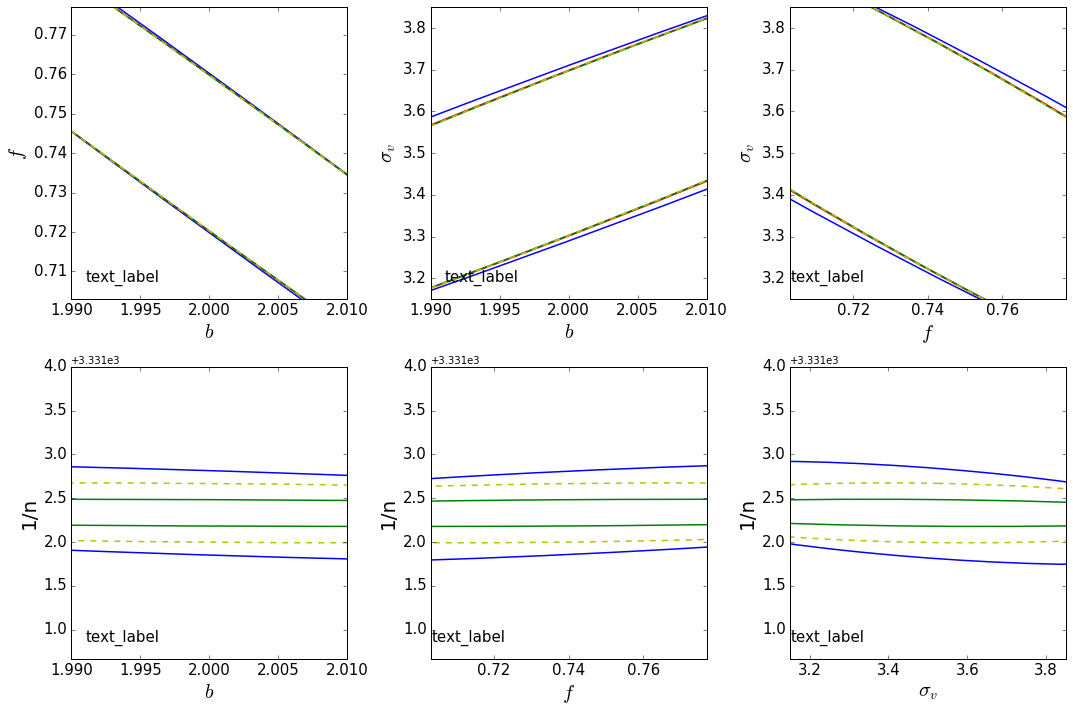

In [241]:
plot_triple_ellipse(['data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p0_fisher_params_nn.txt']
                 , parameter_name = [r'$b$', r'$f$', r'$\sigma_v$', r'1/n']\
                 , linecolor = ['b', 'r', 'g', 'y' ,'b', 'r', 'g', 'y', 'c', 'k']
                 , linestyle = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid']
                 , parameter_truth = [2.0, 0.74, 3.5, 1e+4/3.], diffsky=0, dnn=0
                 , keeps = [[0,1], [0,2], [1,2],[0,3], [1,3], [2,3]]
                 #, extent =[[0.975, 1.025], [0.85, 1.15], [0.5, 1.5], [0.95, 1.05],[0.85, 1.15],[0.75, 1.25]]
                 , extent =[[0.995, 1.005], [0.95, 1.05], [0.9, 1.1], [0.9995, 1.0005]]
                 , text_label = 'text_label\n', out_name = 'test.png')

In [140]:
fisherparams = np.genfromtxt('data_txt/default_kN500_ke-3_rN180_re-3_bfsn_p0_fisher_params_nn.txt')
fisherparams_p = fisherparams[:,1].reshape(4,4)
fisherparams_xi = fisherparams[:,2].reshape(4,4)
fisherparams_tot = fisherparams[:,3].reshape(4,4)

In [141]:
printout_matrix_component(fisherparams_p)
print ''
covparams_p = inv(fisherparams_p)
printout_matrix_component(covparams_p)

[  3.989e+05  1.080e+05  -9.802e+03  7.390e+02]
[  1.080e+05  3.146e+04  -2.269e+03  8.560e+01]
[  -9.802e+03  -2.269e+03  3.193e+02  -3.074e+01]
[  7.390e+02  8.560e+01  -3.074e+01  2.989e+01]

[  7.883e-04  -2.006e-03  9.571e-03  -3.901e-03]
[  -2.006e-03  5.175e-03  -2.384e-02  1.026e-02]
[  9.571e-03  -2.384e-02  1.236e-01  -4.123e-02]
[  -3.901e-03  1.026e-02  -4.123e-02  5.810e-02]


In [143]:
printout_matrix_component(fisherparams_xi)
print ''
covparams_p = inv(fisherparams_xi)
printout_matrix_component(fisherparams_xi)

[  3.947e+05  1.075e+05  -9.629e+03  0.000e+00]
[  1.075e+05  3.139e+04  -2.245e+03  0.000e+00]
[  -9.629e+03  -2.245e+03  3.123e+02  0.000e+00]
[  0.000e+00  0.000e+00  0.000e+00  1.000e-20]

[  3.947e+05  1.075e+05  -9.629e+03  0.000e+00]
[  1.075e+05  3.139e+04  -2.245e+03  0.000e+00]
[  -9.629e+03  -2.245e+03  3.123e+02  0.000e+00]
[  0.000e+00  0.000e+00  0.000e+00  1.000e-20]


In [142]:
printout_matrix_component(fisherparams_tot)
print ''
covparams_tot = inv(fisherparams_tot)
printout_matrix_component(covparams_tot)

[  3.996e+05  1.081e+05  -9.842e+03  8.656e+02]
[  1.081e+05  3.147e+04  -2.270e+03  7.834e+01]
[  -9.842e+03  -2.270e+03  3.216e+02  -3.812e+01]
[  8.656e+02  7.834e+01  -3.812e+01  2.715e+02]

[  5.433e-04  -1.362e-03  6.974e-03  -3.603e-04]
[  -1.362e-03  3.479e-03  -1.701e-02  9.496e-04]
[  6.974e-03  -1.701e-02  9.601e-02  -3.847e-03]
[  -3.603e-04  9.496e-04  -3.847e-03  4.018e-03]


In [210]:
covp = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_p0_PP.cov')
covxi = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_p0_Xi.cov')
covpxi = np.genfromtxt('data_txt/cov/default_kN500_ke-3_rN180_re-3_bfsn_p0_PXi.cov')

nx, ny = covp.shape
covp0 = covp[:nx/3, :ny/3]
nx, ny = covxi.shape
covxi0 = covxi[:nx/3, :ny/3]
nx, ny = covpxi.shape
covpxi0 = covpxi[:nx/3, :ny/3]

In [230]:
fp = inv(covp0)
fxi = inv(covxi0)

In [235]:
#from numpy.linalg import pinv
from scipy.linalg import pinv2
fpxi = pinv2(covpxi0)
print covpxi0.shape, fpxi.shape

(199, 180) (180, 199)


In [237]:
print np.allclose(covpxi0, np.dot(covpxi0, np.dot(fpxi, covpxi0)))
print np.allclose(fpxi, np.dot(fpxi, np.dot(covpxi0, fpxi)))

True
True


In [170]:
ftot_p_sub =  np.dot( np.dot(covpxi0, fxi), covpxi0.T)
ftot_p = inv(covp0 - ftot_p_sub)

In [172]:
f_shot_ponly = np.sum(fp)
f_shot_tot_p = np.sum(ftot_p)
print f_shot_ponly, f_shot_tot_p, np.sum(ftot_p_sub)

29.885939171 271.455355296 92423739.8984


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


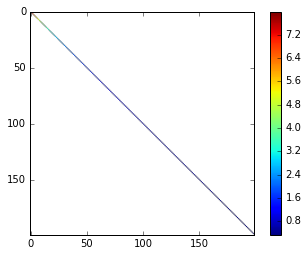

In [189]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covp0))
fig.colorbar(im, ax=ax)

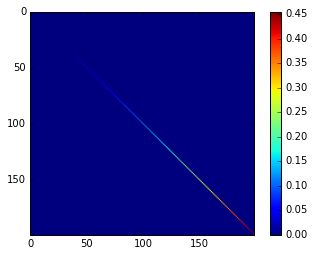

In [176]:
fig, ax = plt.subplots()
im = ax.imshow(fp)
fig.colorbar(im, ax=ax)

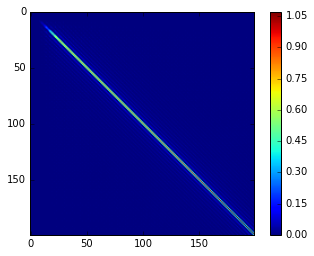

In [177]:
fig, ax = plt.subplots()
im = ax.imshow(ftot_p, vmin = 0)
fig.colorbar(im, ax=ax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


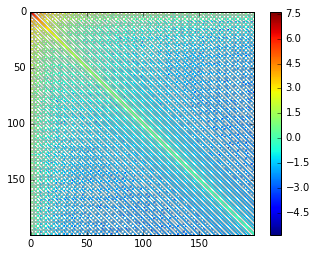

In [188]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(ftot_p_sub))
fig.colorbar(im, ax=ax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


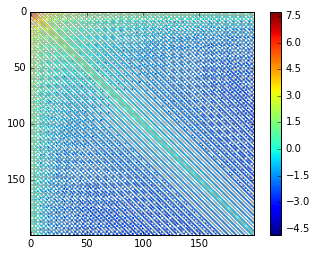

In [191]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covp0-ftot_p_sub))
fig.colorbar(im, ax=ax)

In [193]:
np.sum(covp0), np.sum(covp0-ftot_p_sub ), np.sum(ftot_p_sub)

(128697186.25147288, 36273446.353090324, 92423739.898382545)

In [196]:
np.sum(ftot_p_sub.diagonal()), np.sum(covp0.diagonal()-ftot_p_sub.diagonal() ), np.sum(ftot_p_sub) - np.sum(ftot_p_sub.diagonal())

(61390688.738727227, 67306497.512745634, 31033051.159655318)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


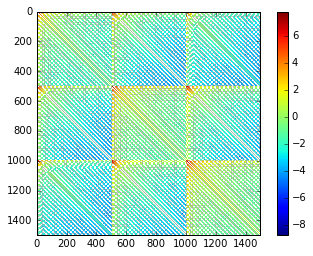

In [114]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(ftot_p_sub))
fig.colorbar(im, ax=ax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


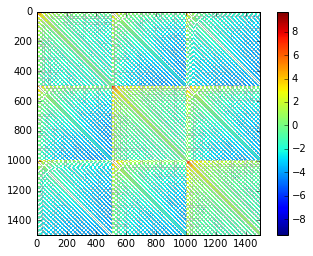

In [116]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covp- ftot_p_sub))
fig.colorbar(im, ax=ax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


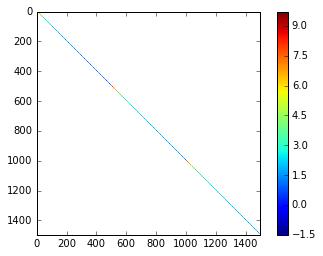

In [115]:
fig, ax = plt.subplots()
im = ax.imshow(np.log10(covp))
fig.colorbar(im, ax=ax)

In [84]:
plot_fisher_corr_matrix(ftot_p)

KeyboardInterrupt: 

In [ ]:
plot_fisher_corr_matrix(ftot_p_sub)